In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
np.random.seed(119)

npoints = 50

x = np.linspace(0,10.,npoints)

m = 2.0
b = 1.0
sigma = 2.0

y = m*x +b +np.random.normal(scale=sigma,size=npoints)
y_err = np.full(npoints,sigma)

Text(0, 0.5, 'y')

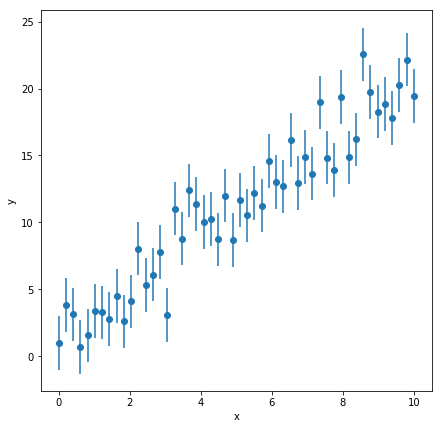

In [4]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,sigma,fmt='o')
plt.xlabel('x')
plt.ylabel('y')

Method #1, polyfit()

In [6]:
m_fit, b_fit = np.poly1d(np.polyfit(x, y, 1, w=1./y_err))
print(m_fit, b_fit)

y_fit = m_fit * x + b_fit

1.9634043470399505 1.283010681296193


Plot result

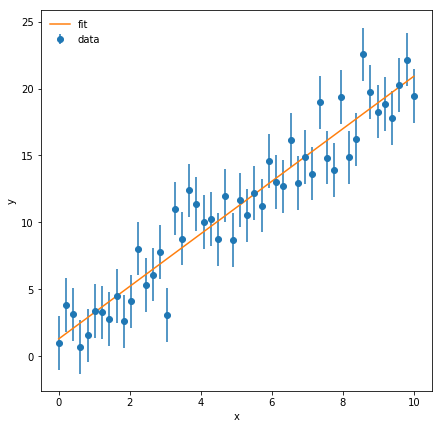

In [7]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o',label='data')
plt.plot(x,y_fit,label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2,frameon=False)

Method #2, scipy + optimize

In [9]:
from scipy import optimize

def f_line(x, m, b):
    return m*x + b

params, params_cov = optimize.curve_fit(f_line,x,y,sigma=y_err)

m_fit = params[0]
b_fit = params[1]
print(m_fit,b_fit)

1.9634043457508432 1.2830106890542259


More complicated fits

Text(0, 0.5, 'y')

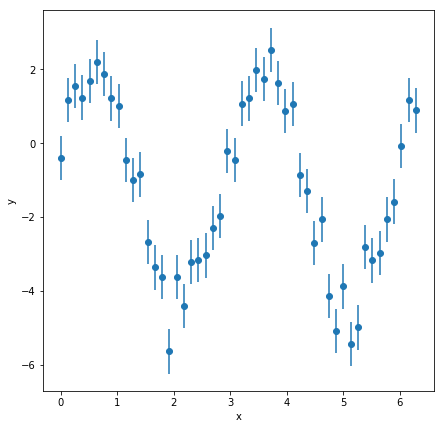

In [15]:
np.random.seed(119)
npoints = 50
x = np.linspace(0.,2*np.pi,npoints)


a = 3.4
b = 2.1
c = 0.27
d = -1.3
sig = 0.6

y = a *np.sin(b*x + c) + d + np.random.normal(scale=sig,size=npoints)
y_err = np.full(npoints,sig)

f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o')
plt.xlabel('x')
plt.ylabel('y')




Perform a fit using scipy,optunuze.curve_fit()

In [16]:
from scipy import optimize

def f_line(x,a,b,c,d):
    return a*np.sin(b*x+c)+d

params, params_cov = optimize.curve_fit(f_line,x,y,sigma=y_err,p0=[1,2.,0.1,-0.1])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]

print(a_fit,b_fit,c_fit,d_fit)

y_fit = a_fit *np.sin(b_fit *x+c_fit)+d_fit

3.2513808201121237 2.0831363759144583 0.3529749080919367 -1.2569945326133365


Plot the fit























































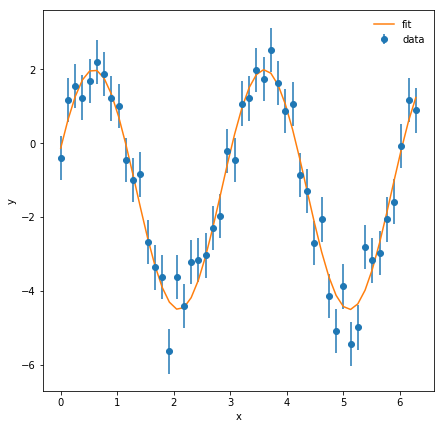

In [17]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o',label='data')
plt.plot(x,y_fit,label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=0,frameon=False)